In [1]:
import pymol
from pymol import cmd, stored
import matplotlib
from matplotlib import cm
import sys
from collections import defaultdict

In [36]:
def open_or_fetch(PDB_ID_or_filename, object_name=None):
    if len(PDB_ID_or_filename) in [4,5] and '.' not in PDB_ID_or_filename:
        cmd.fetch(PDB_ID_or_filename, async=0)
    else:
        if not object_name:
            object_name = PDB_ID_or_filename
        cmd.load(PDB_ID_or_filename, object_name)
        
def save_session(filename_pse='test.pse', pymol_viewer_version='1.72'):
    cmd.set('pse_export_version', pymol_viewer_version)
    cmd.save(filename_pse)

def white_and_beautiful(representation='cartoon'):
    cmd.hide('lines', 'all')
    cmd.show(representation, 'all')
    cmd.select('waters', 'name o')
    cmd.hide('everything', 'waters')
    cmd.color('gray90', 'all')
    cmd.set('bg_rgb', '(1,1,1)')
    cmd.set('surface_quality', '1')
    cmd.set('transparency', '0.5')
    cmd.set('ray_opaque_background', 'off')

    
def prepare_GFP_2WUR():
    cmd.fetch('2WUR', async=0)
    white_and_beautiful()
    cmd.select('waters', 'name o')
    cmd.select('chr', 'resn GYS')
    cmd.select('aa_64_68', 'resi 64+68')
    cmd.select('aa_64_68_mainchain', 'aa_64_68 and name C+CO+CA+N')
    cmd.hide('everything', 'waters')
    cmd.show('sticks', 'chr')
    cmd.color('green', 'chr')
    cmd.show('sticks', 'aa_64_68_mainchain')
    
def color_positions(positions, values=None, representation='spheres', colormap=matplotlib.cm.cool, constant_color=120):
    # only positive values
    assert min(values) >= 0
    if type(constant_color) == int or type(constant_color) == float:
        color = colormap(constant_color)
    elif type(constant_color) == str:
        color = mpl.colors.hex2color(constant_color)
    elif type(constant_color) == tuple:
        color = constant_color
    else:
        print 'Weird color!'

    if str(values) != 'None':
        values = np.array(values) - min(values)
        values = 1. * values / max(values)
    for index, position in enumerate(positions):
        if str(values) != 'None':
            color=colormap(values[index])
        colorName = "color_" + str(position)
        selName = "temp_selection"
        cmd.set_color(colorName, color[0:3])
        cmd.select(selName, 'resi %s' %position)
        cmd.show(representation, selName)
        cmd.color(colorName, selName)
        
def get_residues_from_selection(selection_name, only_numbers=True):
    stored.list=[]
    if only_numbers:
        cmd.iterate("(%s & n. ca)" %selection_name, "stored.list.append(resi)")
        return [int(resi) for resi in stored.list]
    else:
        cmd.iterate("(%s & n. ca)" %selection_name, "stored.list.append((resi, resn))")
        return [(int(resi), resn) for resi, resn in stored.list]
    
def save_session_properly(session_counter, title, folder, prefix):
    session_name = '%s_pse%s_%s.pse' %(prefix, image_counter.get_number(), '_'.join(title.split()))
    save_session(os.path.join(folder, session_name))

### PyMol games

In [3]:
pymol.pymol_argv = ['pymol', '-qc'] # quiet / no GUI
stdout = sys.stdout
stderr = sys.stderr
pymol.finish_launching(['pymol', '-xiq'])
sys.stdout = stdout
sys.stderr = stderr

/Users/karen/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/karen/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


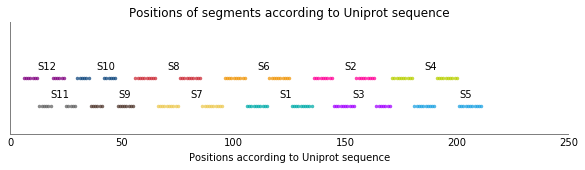

1891 unique mutations across all segments
238 natural unique mutations across all segments
There are 231 single mutations with known effects. They are found in 120 positions


Now the following variables are available:

- data: all data as a (sorted) dictionary in the form: 'segment_name': 'segment_data_as_pandas_dataframe'

- unique_single_mutations: a dictionary with all single mutations for every segment

- data_singles: a sorted dictionary in the form: 'segment_name': 'segment_data_as_pandas_dataframe' for genotypes containing a single substitution

- single_mut_fitness_dict: a dictionary in the form: 'single mutation' : 'fitness'

- data_known_mutations_only - a sorted dictionary in the form: 'segment_name': 'segment_data_as_pandas_dataframe', 
but only for those genotypes that consist of mutations with known effects (single mutant is measured).
For this dictionary, epistasis is measured for every genotype.



/Users/karen/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
%run 'ks01_Data_import.ipynb'
notebook_prefix = 'ks05'
image_counter = Counter()
session_counter = Counter()

#### Creating .pse files with every segment's positions

In [36]:
pdb_file = 'files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction.pdb'
pdb_file = 'files_dump/structure_visualizations/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction__aligned_with_4LOM.pse'

pse_with_ligand = 'files_dump/structure_visualizations/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction__aligned_with_4LOM_with_ligand_white_6A.pse'
object_name='his3_prediction'

In [7]:
for segment_name in positions.segment.values:
    title = 'Segment %s positions' %segment_name
    position_list = positions[positions.segment == segment_name].positions_Uniprot_P06633.values[0]
    cmd.reinitialize()
    open_or_fetch(pdb_file, object_name=object_name)
    white_and_beautiful()
    color_positions(position_list, constant_color=segment_colors[segment_name])
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility


#### Coloring segments positions by fitness of single mutants

In [8]:
for segment_name in positions.segment.values:
    title = 'Fitness of single mutants in segment %s' %segment_name
    position_list = positions[positions.segment == segment_name].positions_Uniprot_P06633.values[0]
    by_position = data_singles[segment_name + '_scaled'].groupby('position_Scer')['s'].agg(np.median)
    cmd.reinitialize()
    open_or_fetch(pdb_file, object_name=object_name)
    white_and_beautiful()
    color_positions(position_list, constant_color='#999999')
    color_positions(by_position.index, values=by_position.values)
    cmd.hide('everything', '4LOM')
    cmd.color('orange', 'ligand')
    cmd.show('spheres', 'ligand')
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility


#### Coloring all positions by fitness of single mutants

In [9]:
title = 'Fitness of single mutants across all segments'
position_list = []
by_position = pd.Series(dtype=np.float)
for segment_name in positions.segment.values:
    position_list.extend(list(positions[positions.segment == segment_name].positions_Uniprot_P06633.values[0]))
    by_position_segment = data_singles[segment_name + '_scaled'].groupby('position_Scer')['s'].agg(np.median)
    by_position = by_position.append(by_position_segment, verify_integrity=True)
cmd.reinitialize()
open_or_fetch(pse_with_ligand)
# white_and_beautiful()
color_positions(position_list, constant_color='#999999')
color_positions(by_position.index, values=by_position.values)
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


#### Mutations in active site

In [10]:
title = 'Fitness of single mutants in active site'
cmd.reinitialize()
open_or_fetch(pse_with_ligand)
active_site = get_residues_from_selection('res_around_ligand_6A & HIS3_saccharomyces_cerevisiae__itasser_model1_prediction')
position_list = by_position.loc[active_site]
color_positions(position_list.index, constant_color='#999999')
color_positions(position_list[~np.isnan(position_list)].index, values=position_list[~np.isnan(position_list)].values)
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


### For Katya

In [67]:
# for Katya
# katya_mutations = ['112T', '172W', '181Y', '181K', '184I', '185T', '187T', '190D', '201K', '204I', '205T', '206S', '207T', '210D', '85I']
# katya_positions = [int(m[:-1]) for m in katya_mutations]
katya_mutations1 = ['181Y', '181K', '184I', '185T', '187T', '190D']
katya_positions1 = [int(m[:-1]) for m in katya_mutations1]

katya_mutations2 = ['201K', '204I', '205T', '206S', '207T', '210D']
katya_positions2 = [int(m[:-1]) for m in katya_mutations2]

title = 'Positions for Katya'
cmd.reinitialize()
open_or_fetch(pdb_file, object_name=object_name)
white_and_beautiful()
color_positions(katya_positions1, representation='sticks', constant_color=10)
color_positions(katya_positions2, representation='sticks', constant_color=250)
cmd.hide('everything', '4LOM')
cmd.color('orange', 'ligand')
cmd.show('spheres', 'ligand')
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


In [55]:
for i in range(10):
    title = 'GFP positions iteration %s' %i
    cmd.reinitialize()
    prepare_GFP_2WUR()
    white_and_beautiful()
    color_positions(np.random.choice(range(235), 39), representation='ribbon')
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility


### Coloring positions by median impact of mutations in all backgrounds

### Nat_lib

#### Using precalculated impacts

In [21]:
by_positions = OrderedDict()
directory = os.path.join(files_dump_folder, 'impacts_of_mutations_in_all_backgrounds__nat_lib')
for segment in data_natural:
    by_positions[segment] = defaultdict(list)
    for f in os.listdir(directory):
        segm = f.split('_')[1]
        mutation = f.split('_')[-1].split('.')[0]
        position = int(mutation[:-1])
        if segm == segment.split('_')[0]:
            by_positions[segment][position].append(pd.read_hdf(os.path.join(directory, f)))

#### Creating PyMol session files

In [50]:
for segment in data_natural:
    positions = []
    impacts = []
    for position in by_positions[segment]:
        impact_values = []
        for series in by_positions[segment][position]:
            impact_values.extend(series.values)
        positions.append(position)
        impacts.append(wt_fitness + np.median(impact_values))
    impacts.append(0) #to scale all segments similarly
#     print positions, impacts
    title = 'segment %s - positions colored by median impact of mutations in all backgrounds in nat_lib' %segment.split('_')[0]
    cmd.reinitialize()
    open_or_fetch(pdb_file, object_name=object_name)
    white_and_beautiful()
    color_positions(positions, values=impacts, representation='spheres')
    cmd.hide('everything', '4LOM')
    cmd.color('orange', 'ligand')
    cmd.show('spheres', 'ligand')
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility


In [58]:
pdb_file = 'files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__swissmodel_prediction.pdb'
positions = []
impacts = []
for segment in data_natural:
    for position in by_positions[segment]:
        impact_values = []
        for series in by_positions[segment][position]:
            impact_values.extend(series.values)
        positions.append(position)
        impacts.append(wt_fitness + np.median(impact_values))
impacts = [max(e, 0.38) for e in impacts]
title = 'all segments - positions colored by median impact of mutations in all backgrounds in nat_lib'
cmd.reinitialize()
open_or_fetch(pdb_file, object_name=object_name)
white_and_beautiful()
color_positions(positions, values=impacts, representation='lines')
# cmd.hide('everything', '4LOM')
# cmd.color('orange', 'ligand')
# cmd.show('spheres', 'ligand')
for segment in data_natural:
    cmd.select('segment_%s' %segment.split('_')[0], 'resi %s' %('+'.join([str(e) for e in by_positions[segment]])))
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


## Full lib

#### Using precalculated impacts

In [21]:
by_positions = OrderedDict()
directory = os.path.join(files_dump_folder, 'impacts_of_mutations_in_all_backgrounds__full_lib')
for segment in data:
    by_positions[segment] = defaultdict(list)
    for f in os.listdir(directory):
        segm = f.split('_')[1]
        mutation = f.split('_')[-1].split('.')[0]
        position = int(mutation[:-1])
        if segm == segment.split('_')[0]:
            by_positions[segment][position].append(pd.read_hdf(os.path.join(directory, f)))

#### Creating PyMol session files

In [24]:
pdb_file = 'files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction.pdb'
for segment in data_natural:
    positions = []
    impacts = []
    for position in by_positions[segment]:
        impact_values = []
        for series in by_positions[segment][position]:
            impact_values.extend(series.values)
        positions.append(position)
        impacts.append(wt_fitness + np.median(impact_values))
    impacts.append(0) #to scale all segments similarly
#     print positions, impacts
    title = 'segment %s - positions colored by median impact of mutations in all backgrounds in nat_lib' %segment.split('_')[0]
    cmd.reinitialize()
    open_or_fetch(pdb_file)
    white_and_beautiful()
    color_positions(positions, values=impacts, representation='spheres')
#     cmd.hide('everything', '4LOM')
#     cmd.color('orange', 'ligand')
#     cmd.show('spheres', 'ligand')
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility
 Applying pse_export_version=1.720 compatibility


In [27]:
pdb_file = 'files_dump/structure_visualizations/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction__aligned_with_4LOM.pse'
positions = []
impacts = []
for segment in data_natural:
    for position in by_positions[segment]:
        impact_values = []
        for series in by_positions[segment][position]:
            impact_values.extend(series.values)
        positions.append(position)
        impacts.append(wt_fitness + np.median(impact_values))
impacts = [max(e, 0.38) for e in impacts]
title = 'all segments - positions colored by median impact of mutations in all backgrounds in nat_lib'
cmd.reinitialize()
open_or_fetch(pdb_file)
white_and_beautiful()
color_positions(positions, values=impacts, representation='lines')
cmd.hide('everything', '4LOM')
cmd.color('orange', 'ligand')
cmd.show('spheres', 'ligand')
for segment in data_natural:
    cmd.select('segment_%s' %segment.split('_')[0], 'resi %s' %('+'.join([str(e) for e in by_positions[segment]])))
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


## Mapping sign epistasis

In [4]:
def select_residue(position_number):
    selection_name = 'r%s' %position_number
    what_to_select = 'resi %s' %position_number
    cmd.select(selection_name, what_to_select)
    print selection_name, what_to_select
    return selection_name

In [18]:
pdb_file = 'files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__itasser_model1_prediction.pdb'
title = 'line_test'
cmd.reinitialize()
open_or_fetch(pdb_file, object_name='HIS3_itasser')
white_and_beautiful()
pos1 = select_residue(10)
pos2 = select_residue(20)
print cmd.distance('qwe', pos1, pos2)
save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

r10 resi 10
r20 resi 20
13.046792984
 Applying pse_export_version=1.720 compatibility


In [38]:
lucas_epistasis.columns

Index([u'VarPos', u'Perm', u'GroupCount', u'mean_FitImpactThreshBad3',
       u'sum_FitImpactThreshBad3', u'mean_FitImpactThreshGood3',
       u'sum_FitImpactThreshGood3', u'mean_FitImpactThreshBad2',
       u'sum_FitImpactThreshBad2', u'mean_FitImpactThreshGood2',
       u'sum_FitImpactThreshGood2', u'ValidationAcc', u'RealPos'],
      dtype='object')

In [55]:
def deviation_from_diagonal(df):
    return np.abs(np.log(df['mean_FitImpactThreshGood2'] / df['mean_FitImpactThreshBad2']))

In [61]:
lucas_epistasis = pd.read_table('/Users/karen/Downloads/Seg2SignEpi.txt')
subset = lucas_epistasis[lucas_epistasis.ValidationAcc > 0.]
subset['diagnoal_deviation'] = subset.apply(deviation_from_diagonal, axis=1)

pdb_file = 'files_dump/structure_predictions/HIS3_saccharomyces_cerevisiae__swissmodel_prediction.pdb'
columns = ['mean_FitImpactThreshGood2', 'sum_FitImpactThreshGood2', 'mean_FitImpactThreshBad2', 'sum_FitImpactThreshBad2']
for column in ['diagnoal_deviation']:
    title = 'Lucas sign epistasis dataset for segment 2  %s' %column 
    cmd.reinitialize()
    open_or_fetch(pdb_file, object_name='HIS3')
    white_and_beautiful()
    to_plot = subset.groupby('RealPos')[column].agg(np.max)
    color_positions(to_plot.index, to_plot.values)
    save_session_properly(session_counter, title, pymol_sessions_folder, notebook_prefix)

 Applying pse_export_version=1.720 compatibility


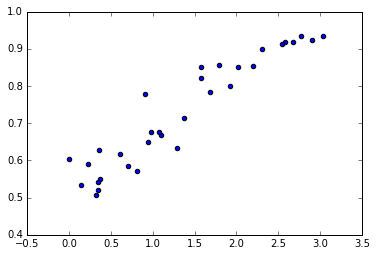

In [60]:
plt.scatter(subset['diagnoal_deviation'], subset['ValidationAcc'])